# Predicting the Winning Football Team

- Sports betting is a 500 billion dollar market (Sydney Herald)

- Football is played by 250 million players in over 200 countries (most popular sport globally).
- The English Premier League is the most popular domestic team in the world.
- Design a predictive model capable of accurately predicting if the home team will win a football match?


**Discription of Dataset**


**A prediction system was built to predict whether a home team will win it's match or not.**

Key to results data:

- Div = League Division
- Date = Match Date (dd/mm/yy)
- Time = Time of match kick-off
- HomeTeam = Home Team
- Away team = Away Team
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full-Time Away Team Goals
- FTR and Res = Full-Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG = Half Time Home Team Goals
- HTAG = Half Time Away Team Goals
- HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)

- Attendance = Crowd Attendance
- Referee = Match Referee
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HHW = Home Team Hit Woodwork
- AHW = Away Team Hit Woodwork
- HC = Home Team Corners
- AC = Away Team Corners
- HF = Home Team Fouls Committed
- AF = Away Team Fouls Committed
- HFKC = Home Team Free Kicks Conceded
- AFKC = Away Team Free Kicks Conceded
- HO = Home Team Offsides
- AO = Away Team Offsides
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
  \*HR = Home Team Red Cards
  AR = Away Team Red Cards
  HBP = Home Team Bookings Points (10 = yellow, 25 = red)
  ABP = Away Team Bookings Points (10 = yellow, 25 = red)


### Importing the dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [2]:
# Read data from the CSV into a dataframe
folder='../Datasets/'
raw_data_1 = pd.read_csv(folder +'2000-01.csv')
raw_data_2 = pd.read_csv(folder +'2001-02.csv')
raw_data_3 = pd.read_csv(folder +'2002-03.csv')
raw_data_4 = pd.read_csv(folder +'2003-04.csv')
raw_data_5 = pd.read_csv(folder +'2004-05.csv')
raw_data_6 = pd.read_csv(folder +'2005-06.csv')
raw_data_7 = pd.read_csv(folder +'2006-07.csv')
raw_data_8 = pd.read_csv(folder +'2007-08.csv')
raw_data_9 = pd.read_csv(folder +'2008-09.csv')
raw_data_10 = pd.read_csv(folder +'2009-10.csv')
raw_data_11 = pd.read_csv(folder +'2010-11.csv')
raw_data_12 = pd.read_csv(folder +'2011-12.csv')
raw_data_13 = pd.read_csv(folder +'2012-13.csv')
raw_data_14 = pd.read_csv(folder +'2013-14.csv')
raw_data_15 = pd.read_csv(folder +'2014-15.csv')
raw_data_16 = pd.read_csv(folder +'2015-16.csv')
raw_data_17 = pd.read_csv(folder +'2016-17.csv')
raw_data_18 = pd.read_csv(folder +'2017-18.csv')
raw_data_19 = pd.read_csv(folder +'2018-19.csv')
raw_data_20 = pd.read_csv(folder +'2019-20.csv')


## **Self Implemented Code**


In [3]:
# Print all the columns from all the dataframes

dataframes = [raw_data_1, raw_data_2, raw_data_3, raw_data_4, raw_data_5,
             raw_data_6, raw_data_7, raw_data_8, raw_data_9, raw_data_10,
             raw_data_11, raw_data_12, raw_data_13, raw_data_14, raw_data_15,
             raw_data_16, raw_data_17, raw_data_18, raw_data_19, raw_data_20]

for df in dataframes:
    print(df.columns.tolist())

['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'H

In [4]:

#Gets all the statistics related to gameplay
                      
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]
playing_statistics_19 = raw_data_19[columns_req]
playing_statistics_20 = raw_data_20[columns_req]

**GOALS SCORED AND CONCEDED AT THE END OF MATCHWEEK, ARRANGED BY TEAMS AND MATCHWEEK**


In [5]:
# Gets the goals scored agg arranged by teams and matchweek
def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Calculate number of matchweeks based on total matches and teams
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_team = len(teams[list(teams.keys())[0]])
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1, matches_per_team + 1)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2, matches_per_team + 1):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored

# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Calculate number of matchweeks based on total matches and teams
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_team = len(teams[list(teams.keys())[0]])
    
    # Create a dataframe for goals conceded where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1, matches_per_team + 1)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2, matches_per_team + 1):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded
    
def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_round = num_teams // 2
    total_matches = len(playing_stat)

    for i in range(total_matches):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1) % matches_per_round) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat

# Apply to each dataset
playing_statistics_1 = get_gss(playing_statistics_1)
playing_statistics_2 = get_gss(playing_statistics_2)
playing_statistics_3 = get_gss(playing_statistics_3)
playing_statistics_4 = get_gss(playing_statistics_4)
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_17 = get_gss(playing_statistics_17)
playing_statistics_18 = get_gss(playing_statistics_18)
playing_statistics_19 = get_gss(playing_statistics_19)
playing_statistics_20 = get_gss(playing_statistics_20)


/tmp/ipykernel_19100/3226335908.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_19100/3226335908.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_19100/3226335908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

**GET RESPECTIVE POINTS**


In [6]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    # Get the actual number of columns (matchweeks) in the data
    num_matchweeks = len(matchres.columns)
    for i in range(2, num_matchweeks + 1):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
    
    # Get the number of teams from the matchres DataFrame
    num_teams = len(matchres)
    matchres_points.insert(column=0, loc=0, value=[0 for i in range(num_teams)])
    return matchres_points
def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
    
    # Calculate the actual number of matchweeks based on matches per team
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_team = len(teams[list(teams.keys())[0]])
    
    # Create a dataframe for match results where rows are teams and cols are matchweek
    matchres = pd.DataFrame(data=teams, index=[i for i in range(1, matches_per_team + 1)]).T
    return matchres
def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    
    # Calculate matches per round dynamically
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_round = num_teams // 2
    total_matches = len(playing_stat)
    
    for i in range(total_matches):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1) % matches_per_round) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
# Apply to each dataset
playing_statistics_1 = get_agg_points(playing_statistics_1)
playing_statistics_2 = get_agg_points(playing_statistics_2)
playing_statistics_3 = get_agg_points(playing_statistics_3)
playing_statistics_4 = get_agg_points(playing_statistics_4)
playing_statistics_5 = get_agg_points(playing_statistics_5)
playing_statistics_6 = get_agg_points(playing_statistics_6)
playing_statistics_7 = get_agg_points(playing_statistics_7)
playing_statistics_8 = get_agg_points(playing_statistics_8)
playing_statistics_9 = get_agg_points(playing_statistics_9)
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)
playing_statistics_17 = get_agg_points(playing_statistics_17)
playing_statistics_18 = get_agg_points(playing_statistics_18)
playing_statistics_19 = get_agg_points(playing_statistics_19)
playing_statistics_20 = get_agg_points(playing_statistics_20)

/tmp/ipykernel_19100/3296286409.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matchres_points = matchres.applymap(get_points)
/tmp/ipykernel_19100/3296286409.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipykernel_19100/3296286409.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP
/tmp/ipykernel_19100/3296286409.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead

In [7]:
def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
    
    # Get the number of teams from the matchres DataFrame
    num_teams = len(matchres)
    matchres_points.insert(column=0, loc=0, value=[0 for i in range(num_teams)])
    return matchres_points

**GET TEAM FORM:**


In [8]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    
    # Calculate the actual number of matchweeks dynamically
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_team = len(playing_stat) // num_teams
    max_matchweeks = matches_per_team + 1  # +1 because we start from matchweek 1
    
    for i in range(num, max_matchweeks):
        form_final[i] = ''
        j = 1
        while j <= num:
            if (i-j) in form.columns:  # Check if column exists
                form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    
    # Calculate matches per round dynamically
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_round = num_teams // 2
    total_matches = len(playing_stat)
    
    h = ['M' for i in range(num * matches_per_round)]  # since form is not available for n MW
    a = ['M' for i in range(num * matches_per_round)]
    
    j = num
    for i in range((num * matches_per_round), total_matches):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        if len(past) >= num:
            h.append(past[0])                    # 0 index is most recent (first character)
        else:
            h.append('M')
        
        past = form.loc[at][j]               # get past n results.
        if len(past) >= num:
            a.append(past[0])                   # 0 index is most recent (first character)
        else:
            a.append('M')
        
        if ((i + 1) % matches_per_round) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    return playing_stat

def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    
    
# Make changes to df
playing_statistics_1 = add_form_df(playing_statistics_1)
playing_statistics_2 = add_form_df(playing_statistics_2)
playing_statistics_3 = add_form_df(playing_statistics_3)
playing_statistics_4 = add_form_df(playing_statistics_4)
playing_statistics_5 = add_form_df(playing_statistics_5)
playing_statistics_6 = add_form_df(playing_statistics_6)
playing_statistics_7 = add_form_df(playing_statistics_7)
playing_statistics_8 = add_form_df(playing_statistics_8)
playing_statistics_9 = add_form_df(playing_statistics_9)
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
playing_statistics_15 = add_form_df(playing_statistics_15)
playing_statistics_16 = add_form_df(playing_statistics_16)
playing_statistics_17 = add_form_df(playing_statistics_17)
playing_statistics_18 = add_form_df(playing_statistics_18)
playing_statistics_19 = add_form_df(playing_statistics_19)
playing_statistics_20 = add_form_df(playing_statistics_20)

/tmp/ipykernel_19100/61553463.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HM' + str(num)] = h
/tmp/ipykernel_19100/61553463.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['AM' + str(num)] = a
/tmp/ipykernel_19100/61553463.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [9]:
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_statistics_1 = playing_statistics_1[cols]
playing_statistics_2 = playing_statistics_2[cols]
playing_statistics_3 = playing_statistics_3[cols]
playing_statistics_4 = playing_statistics_4[cols]
playing_statistics_5 = playing_statistics_5[cols]
playing_statistics_6 = playing_statistics_6[cols]
playing_statistics_7 = playing_statistics_7[cols]
playing_statistics_8 = playing_statistics_8[cols]
playing_statistics_9 = playing_statistics_9[cols]
playing_statistics_10 = playing_statistics_10[cols]
playing_statistics_11 = playing_statistics_11[cols]
playing_statistics_12 = playing_statistics_12[cols]
playing_statistics_13 = playing_statistics_13[cols]
playing_statistics_14 = playing_statistics_14[cols]
playing_statistics_15 = playing_statistics_15[cols]
playing_statistics_16 = playing_statistics_16[cols]
playing_statistics_17 = playing_statistics_17[cols]
playing_statistics_18 = playing_statistics_18[cols]
playing_statistics_19 = playing_statistics_19[cols]
playing_statistics_20 = playing_statistics_20[cols]


**Get MatchWeek:**


In [11]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    num_matches = len(playing_stat)
    matches_per_week = 10  # Premier League typically has 10 matches per week
    
    for i in range(num_matches):
        MatchWeek.append(j)
        if ((i + 1) % matches_per_week) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_1 = get_mw(playing_statistics_1)
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)
playing_statistics_9 = get_mw(playing_statistics_9)
playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_17 = get_mw(playing_statistics_17)
playing_statistics_18 = get_mw(playing_statistics_18)
playing_statistics_19 = get_mw(playing_statistics_19)
playing_statistics_20 = get_mw(playing_statistics_20)

**FINAL DATAFRAME**


In [12]:
playing_stat = pd.concat([playing_statistics_1,
                          playing_statistics_2,
                          playing_statistics_3,
                          playing_statistics_4,
                          playing_statistics_5,
                          playing_statistics_6,
                          playing_statistics_7,
                          playing_statistics_8,
                          playing_statistics_9,
                          playing_statistics_10,
                          playing_statistics_11,
                          playing_statistics_12,
                          playing_statistics_13,
                          playing_statistics_14,
                          playing_statistics_15,
                          playing_statistics_16,
                          playing_statistics_17,
                          playing_statistics_18,
                          playing_statistics_19,
                          playing_statistics_20
                          ], ignore_index=True)


# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [13]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

In [14]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [15]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Testing set (2015-16 season)
playing_stat_test = playing_stat[5700:]

In [17]:
#saving the final dataset
playing_stat.to_csv('Self_Datasets/Football_match_prediction_copy.csv')

In [18]:
#saving the test set
playing_stat_test.to_csv("Self_Datasets/Football_match_prediction_copy_test.csv")

In [19]:
#loading the final dataset
dataset = pd.read_csv('Self_Datasets/Football_match_prediction_copy.csv')

In [20]:
dataset.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [21]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

## Dataset Features: Detailed Description

### **Basic Match Information**

- **Date**: Match date - Essential for temporal analysis and seasonal patterns
- **HomeTeam**: Name of the home team - Critical for home advantage analysis
- **AwayTeam**: Name of the away team - Used for team-specific performance tracking
- **FTHG (Full Time Home Goals)**: Goals scored by home team - Direct match outcome indicator
- **FTAG (Full Time Away Goals)**: Goals scored by away team - Direct match outcome indicator
- **FTR (Full Time Result)**: Match result (H=Home Win, D=Draw, A=Away Win) - **Target variable** for prediction

### **Cumulative Performance Metrics**

- **HTGS (Home Team Goals Scored)**: Cumulative goals scored by home team up to current matchweek

  - _Derivation_: Running total of all goals scored by the team in previous matches
  - _Utility_: Indicates offensive strength and scoring consistency over time

- **ATGS (Away Team Goals Scored)**: Cumulative goals scored by away team up to current matchweek

  - _Derivation_: Running total of all goals scored by the team in previous matches
  - _Utility_: Shows away team's attacking prowess and goal-scoring ability

- **HTGC (Home Team Goals Conceded)**: Cumulative goals conceded by home team up to current matchweek

  - _Derivation_: Running total of all goals conceded by the team in previous matches
  - _Utility_: Reflects defensive stability and ability to prevent goals

- **ATGC (Away Team Goals Conceded)**: Cumulative goals conceded by away team up to current matchweek
  - _Derivation_: Running total of all goals conceded by the team in previous matches
  - _Utility_: Indicates defensive weaknesses and vulnerability

### **Points and League Position Indicators**

- **HTP (Home Team Points)**: Cumulative league points earned by home team up to current matchweek

  - _Derivation_: 3 points for win, 1 for draw, 0 for loss - accumulated over season
  - _Utility_: Direct measure of team's overall performance and league standing

- **ATP (Away Team Points)**: Cumulative league points earned by away team up to current matchweek
  - _Derivation_: Same point system as HTP, accumulated over season
  - _Utility_: Shows away team's season performance and competitive strength

### **Recent Form Indicators (Last 1-5 Matches)**

- **HM1-HM5**: Home team's results in last 1-5 matches (W/D/L)

  - _Derivation_: Character strings showing most recent match results
  - _Utility_: Captures current momentum, confidence, and short-term performance trends

- **AM1-AM5**: Away team's results in last 1-5 matches (W/D/L)
  - _Derivation_: Character strings showing most recent match results
  - _Utility_: Indicates current form and psychological state of away team

### **Temporal Context**

- **MW (Match Week)**: Current matchweek number in the season
  - _Derivation_: Sequential numbering based on fixture scheduling
  - _Utility_: Controls for seasonal effects, fatigue, and experience accumulation

### **Advanced Performance Metrics**

- **HTGD (Home Team Goal Difference)**: Goals scored minus goals conceded for home team

  - _Derivation_: HTGS - HTGC, normalized by matchweek
  - _Utility_: Single metric combining offensive and defensive performance

- **ATGD (Away Team Goal Difference)**: Goals scored minus goals conceded for away team

  - _Derivation_: ATGS - ATGC, normalized by matchweek
  - _Utility_: Comprehensive measure of team quality and balance

- **DiffPts (Points Difference)**: Difference in accumulated points between teams

  - _Derivation_: HTP - ATP, normalized by matchweek
  - _Utility_: Direct comparison of team standings and relative strength

- **DiffFormPts (Form Points Difference)**: Difference in recent form points
  - _Derivation_: HTFormPts - ATFormPts (points from last 5 matches)
  - _Utility_: Captures momentum differential and current competitive edge

### **Form Analysis Features**

- **HTFormPts/ATFormPts**: Points earned from last 5 matches

  - _Derivation_: Sum of points from HM1-HM5 and AM1-AM5 respectively
  - _Utility_: Quantifies recent performance trend

- **Win/Loss Streak Indicators**: Binary flags for 3-game and 5-game streaks
  - _Derivation_: Pattern matching on form strings (WWW, WWWWW, LLL, LLLLL)
  - _Utility_: Identifies teams in exceptional form (positive or negative momentum)

### **Why These Features Are Valuable:**

1. **Predictive Power**: Combine historical performance with current form
2. **Normalization**: Metrics scaled by matchweek account for season progression
3. **Multi-dimensional Analysis**: Cover offense, defense, overall performance, and momentum
4. **Home Advantage**: Separate tracking for home/away performance differences
5. **Temporal Relevance**: Recent form weighted more heavily than distant past
6. **Comparative Analysis**: Direct team-vs-team comparisons (difference metrics)

This feature set provides a comprehensive view of team performance, enabling the model to capture both long-term quality and short-term momentum that influence match outcomes.


### Correlation Matrix for dataset


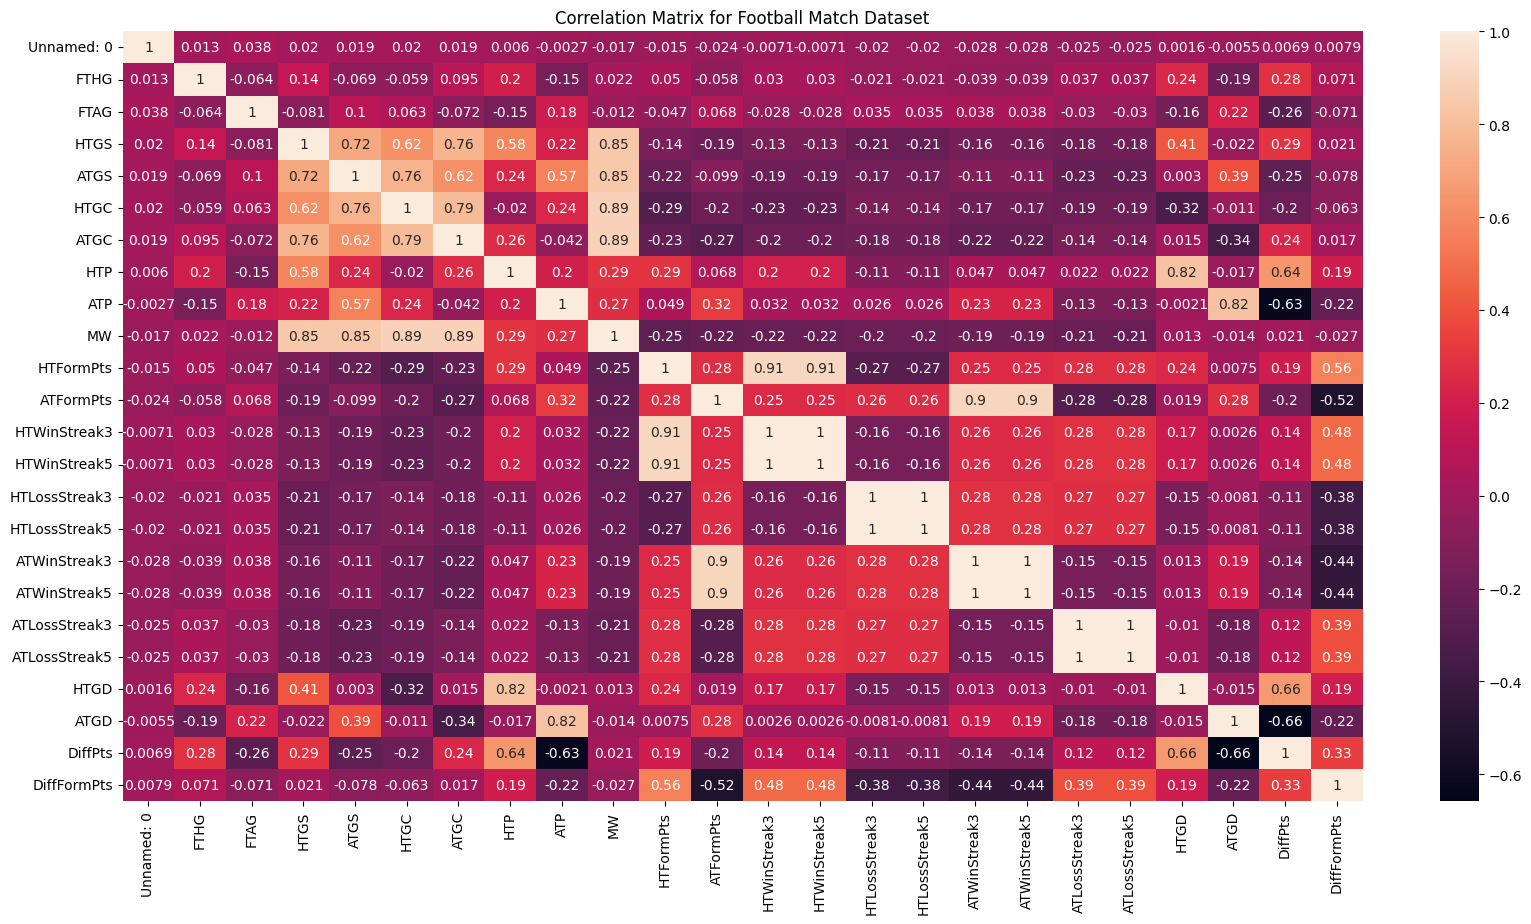

In [23]:
plt.figure(figsize=(20,10)) 
# Select only numeric columns for correlation matrix
numeric_cols = dataset.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True)
plt.title('Correlation Matrix for Football Match Dataset')
plt.show()

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.


In [ ]:
# Remove few columns
# Removing these columns for the following reasons:
# 1. Non-predictive identifiers: 'Date', 'HomeTeam', 'AwayTeam' - These are categorical identifiers that don't contribute to predictive modeling
# 2. Target leakage: 'FTHG', 'FTAG' - Full time goals are outcomes of the match, using them would leak future information
# 3. Redundant cumulative stats: 'HTGS', 'ATGS', 'HTGC', 'ATGC' - These are already incorporated into goal difference metrics
# 4. Less informative form indicators: 'HM4', 'HM5', 'AM4', 'AM5' - Longer-term form is less predictive than recent form (HM1-HM3)
# 5. Temporal identifier: 'MW' - Matchweek number doesn't directly predict outcomes
# 6. Intermediate calculations: 'HTFormPtsStr', 'ATFormPtsStr' - String representations used to calculate numerical form points
# 7. Redundant form metrics: 'HTFormPts', 'ATFormPts' - Individual team form points are less informative than the difference (DiffFormPts)
# 8. Low-impact streak indicators: Win/Loss streak flags for 3 and 5 games - These specific patterns are less predictive
# 9. Redundant comparison: 'DiffPts' - This metric is less informative compared to other difference metrics we're keeping
# The goal is to reduce dimensionality while retaining the most predictive features for home team win prediction

dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
  'HTGS', 'ATGS', 'HTGC', 'ATGC',
  'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
  'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
  'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
  'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
  'DiffPts'] )

In [25]:
dataset2.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')

In [26]:
dataset2.head(10)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,1,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,3,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,4,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
5,5,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
6,6,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
7,7,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
8,8,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
9,9,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


In [27]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 7260
Number of features: 12
Number of matches won by home team: 3360
Win rate of home team: 46.28%


## Visualise the dataset


array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

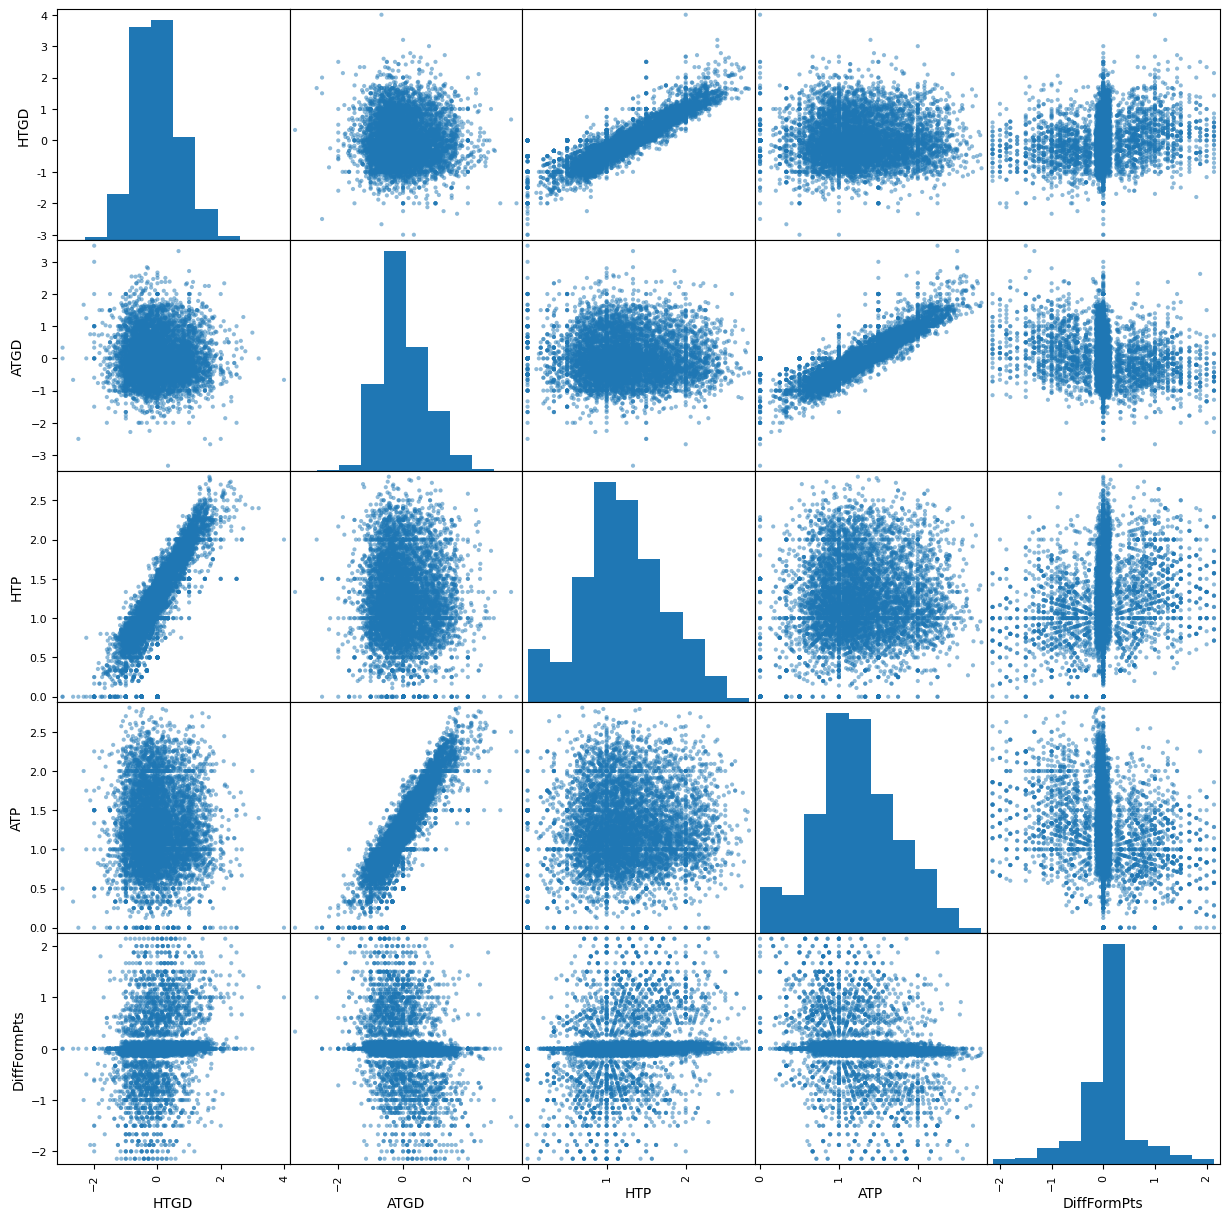

In [28]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

In [30]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset2.drop(columns=['FTR'])
y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = ['HTGD','ATGD','HTP','ATP']
for col in cols:
    X_all[col] = scale(X_all[col])
    

In [37]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


## Final Feature Analysis for Football Match Prediction

### **1. Unnamed: 0**

- **Description**: Index column from the original dataset
- **Derivation**: Automatically generated when saving/loading CSV files
- **Significance**: No predictive value - should be removed in preprocessing
- **Impact on Target**: None - purely administrative

---

### **2. HTP (Home Team Points)**

- **Description**: Cumulative league points earned by the home team up to the current matchweek
- **Derivation**:
  ```
  Points System: Win = 3 points, Draw = 1 point, Loss = 0 points
  HTP = Sum of all points earned in previous matches this season
  Normalized by matchweek: HTP = Total Points / Current Matchweek
  ```
- **Significance**: Direct measure of team quality and season performance
- **Impact on Target**: **High Positive Correlation** - Teams with more points are more likely to win
- **Why Important**: Reflects overall team strength, consistency, and current league position

---

### **3. ATP (Away Team Points)**

- **Description**: Cumulative league points earned by the away team up to the current matchweek
- **Derivation**: Same as HTP but for the away team, normalized by matchweek
- **Significance**: Measures away team's season performance and competitive level
- **Impact on Target**: **High Negative Correlation** - Higher away team points reduce home team win probability
- **Why Important**: Essential for comparative analysis between competing teams

---

### **4-7. HM1 Form Indicators (Home Team Last Match)**

**HM1_D, HM1_L, HM1_M, HM1_W** (One-hot encoded)

- **Description**: Result of home team's most recent match
- **Derivation**:
  ```
  Original: Single character (W/D/L/M)
  Transformed: Binary indicators via get_dummies()
  HM1_W = 1 if last match was Won, 0 otherwise
  HM1_D = 1 if last match was Draw, 0 otherwise
  HM1_L = 1 if last match was Lost, 0 otherwise
  HM1_M = 1 if no data available (Missing), 0 otherwise
  ```
- **Significance**: **Immediate momentum indicator** - most recent form is highly predictive
- **Impact on Target**:
  - **HM1_W**: Strong positive correlation with home wins
  - **HM1_L**: Strong negative correlation with home wins
  - **HM1_D**: Moderate impact
- **Why Important**: Recent performance strongly influences confidence, morale, and tactical approach

---

### **8-11. HM2 Form Indicators (Home Team 2nd Last Match)**

**HM2_D, HM2_L, HM2_M, HM2_W**

- **Description**: Result of home team's second most recent match
- **Derivation**: Same one-hot encoding as HM1, but for match played 2 games ago
- **Significance**: Secondary momentum indicator with declining influence
- **Impact on Target**: Moderate correlation, less than HM1 but still significant
- **Why Important**: Helps identify short-term trends and consistency patterns

---

### **12-15. HM3 Form Indicators (Home Team 3rd Last Match)**

**HM3_D, HM3_L, HM3_M, HM3_W**

- **Description**: Result of home team's third most recent match
- **Derivation**: One-hot encoded result from 3 matches ago
- **Significance**: Tertiary momentum indicator with further reduced influence
- **Impact on Target**: Weak to moderate correlation
- **Why Important**: Provides context for form trends but less predictive weight

---

### **16-19. AM1 Form Indicators (Away Team Last Match)**

**AM1_D, AM1_L, AM1_M, AM1_W**

- **Description**: Result of away team's most recent match
- **Derivation**: Same encoding as HM1 but for away team
- **Significance**: Critical for assessing away team momentum
- **Impact on Target**:
  - **AM1_W**: Strong negative correlation with home wins
  - **AM1_L**: Strong positive correlation with home wins
- **Why Important**: Away team form significantly impacts match dynamics

---

### **20-23. AM2 Form Indicators (Away Team 2nd Last Match)**

**AM2_D, AM2_L, AM2_M, AM2_W**

- **Description**: Away team's second most recent match result
- **Derivation**: One-hot encoded result from 2 matches ago
- **Significance**: Secondary away team momentum indicator
- **Impact on Target**: Moderate negative correlation with home wins

---

### **24-27. AM3 Form Indicators (Away Team 3rd Last Match)**

**AM3_D, AM3_L, AM3_M, AM3_W**

- **Description**: Away team's third most recent match result
- **Derivation**: One-hot encoded result from 3 matches ago
- **Significance**: Tertiary away team momentum indicator
- **Impact on Target**: Weak correlation with home wins

---

### **28. HTGD (Home Team Goal Difference)**

- **Description**: Home team's goal difference normalized by matchweek
- **Derivation**:
  ```
  HTGD = (Cumulative Goals Scored - Cumulative Goals Conceded) / Matchweek
  Raw Calculation: HTGS - HTGC
  Normalization accounts for seasonal progression
  ```
- **Combined Features**:
  - **HTGS** (Home Team Goals Scored): Cumulative attacking output
  - **HTGC** (Home Team Goals Conceded): Cumulative defensive performance
- **Significance**: **Single metric combining offensive and defensive capability**
- **Impact on Target**: **Very High Positive Correlation** - Teams with better goal difference win more
- **Why Critical**:
  - Balances attack and defense
  - Indicates overall team quality
  - Strong predictor of match outcomes
  - Accounts for both scoring ability and defensive solidity

---

### **29. ATGD (Away Team Goal Difference)**

- **Description**: Away team's goal difference normalized by matchweek
- **Derivation**: Same as HTGD but for away team: (ATGS - ATGC) / Matchweek
- **Combined Features**: ATGS (Away Goals Scored) + ATGC (Away Goals Conceded)
- **Significance**: Comprehensive measure of away team quality
- **Impact on Target**: **Very High Negative Correlation** - Better away team goal difference reduces home win probability
- **Why Critical**: Essential counterpart to HTGD for team comparison

---

### **30. DiffFormPts (Form Points Difference)**

- **Description**: Difference between home and away team form points from last 5 matches
- **Derivation**:
  ```
  HTFormPts = Sum of points from HM1-HM5 (W=3, D=1, L=0)
  ATFormPts = Sum of points from AM1-AM5 (W=3, D=1, L=0)
  DiffFormPts = HTFormPts - ATFormPts
  Range: -15 to +15 points
  ```
- **Combined Features**: All recent form indicators (HM1-HM5, AM1-AM5)
- **Significance**: **Direct comparison of recent momentum between teams**
- **Impact on Target**: **High Positive Correlation**
  - Positive values favor home team wins
  - Negative values favor away team/draw outcomes
- **Why Important**:
  - Captures relative momentum
  - More predictive than individual team form
  - Accounts for psychological factors
  - Reflects current competitive edge

---

## **Feature Importance Hierarchy**

### **Tier 1 - Critical Predictors:**

1. **HTGD & ATGD**: Overall team quality measures
2. **DiffFormPts**: Recent momentum comparison
3. **HTP & ATP**: Season-long performance indicators

### **Tier 2 - Important Indicators:**

4. **HM1_W, HM1_L**: Immediate home team form
5. **AM1_W, AM1_L**: Immediate away team form

### **Tier 3 - Supporting Features:**

6. **HM2, AM2 indicators**: Secondary form context
7. **HM3, AM3 indicators**: Tertiary form background

### **Tier 4 - Remove:**

8. **Unnamed: 0**: No predictive value

---

## **Key Insights for Model Performance**

1. **Goal Difference** (HTGD, ATGD) are the strongest predictors because they encapsulate both offensive and defensive capabilities

2. **Recent Form** (especially last match) has high predictive power due to psychological momentum effects

3. **Form Difference** (DiffFormPts) is more informative than individual team form because it provides direct comparison

4. **Seasonal Points** (HTP, ATP) provide long-term context but are less dynamic than form-based features

5. **One-hot Encoding** of categorical form variables allows the model to capture non-linear relationships between different match outcomes

This feature set effectively balances **historical performance** (points, goal difference) with **current momentum** (recent form), providing comprehensive team assessment for accurate match prediction.


In [73]:
X_all.head(10)

,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
0,0,-2.243556,-2.302919,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013859,-0.020465,0.0
1,1,-2.243556,-2.302919,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013859,-0.020465,0.0
2,2,-2.243556,-2.302919,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013859,-0.020465,0.0
3,3,-2.243556,-2.302919,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013859,-0.020465,0.0
4,4,-2.243556,-2.302919,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013859,-0.020465,0.0
5,5,-2.243556,-2.302919,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013859,-0.020465,0.0
6,6,-2.243556,-2.302919,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013859,-0.020465,0.0
7,7,-2.243556,-2.302919,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013859,-0.020465,0.0
8,8,-2.243556,-2.302919,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013859,-0.020465,0.0
9,9,-2.243556,-2.302919,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013859,-0.020465,0.0


## Spliting the dataset


In [39]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

# Applying the Logistic Regression


In [40]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/media/toni-birat/New Volume/English_Premier_League_Complete_Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [41]:
Y_pred = classifier.predict(X_test)

In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

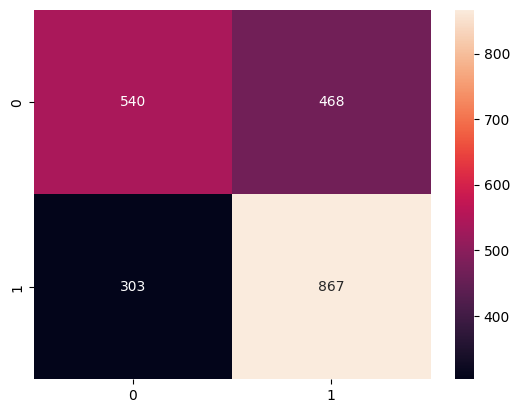

In [43]:
sns.heatmap(cm, annot=True,fmt='d')

In [44]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.64      0.54      0.58      1008
          NH       0.65      0.74      0.69      1170

    accuracy                           0.65      2178
   macro avg       0.65      0.64      0.64      2178
weighted avg       0.65      0.65      0.64      2178



# Applying the SVM


In [45]:
#fitting the SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [46]:
#predicting result
Y_pred = classifier.predict(X_test)

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

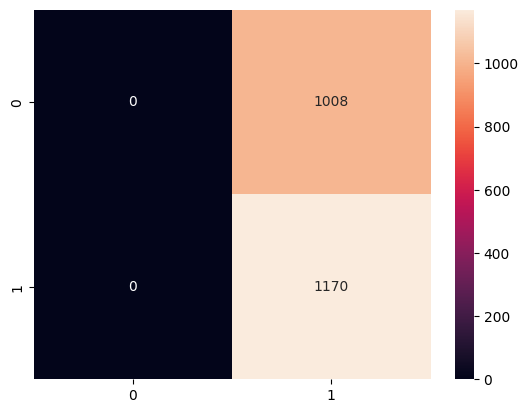

In [48]:
sns.heatmap(cm, annot=True, fmt='d')

In [49]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.00      0.00      0.00      1008
          NH       0.54      1.00      0.70      1170

    accuracy                           0.54      2178
   macro avg       0.27      0.50      0.35      2178
weighted avg       0.29      0.54      0.38      2178



/media/toni-birat/New Volume/English_Premier_League_Complete_Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/toni-birat/New Volume/English_Premier_League_Complete_Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/toni-birat/New Volume/English_Premier_League_Complete_Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

# Applying the RandomForest


In [51]:
#fitting the RANDOM FOREST to the training set
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='sqrt',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [52]:
#predicting result
Y_pred = classifier.predict(X_test)

In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

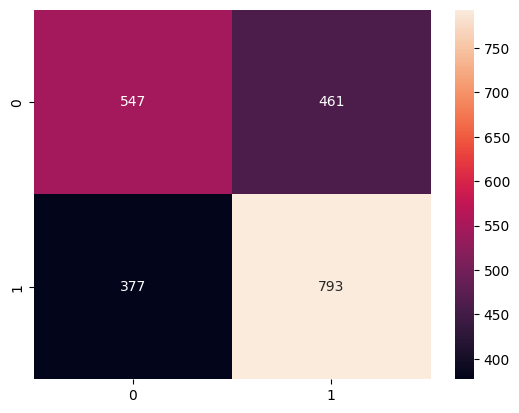

In [55]:
sns.heatmap(cm, annot=True, fmt='d')

In [56]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.59      0.54      0.57      1008
          NH       0.63      0.68      0.65      1170

    accuracy                           0.62      2178
   macro avg       0.61      0.61      0.61      2178
weighted avg       0.61      0.62      0.61      2178



# Applying the XGBoost


In [59]:
# Install XGBoost if not already installed
# %pip install xgboost

# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode target labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

classifier = XGBClassifier(seed=82)
classifier.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [60]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
# Decode the predictions back to original labels
Y_pred_decoded = label_encoder.inverse_transform(Y_pred)
cm = confusion_matrix(y_test, Y_pred_decoded)

<Axes: >

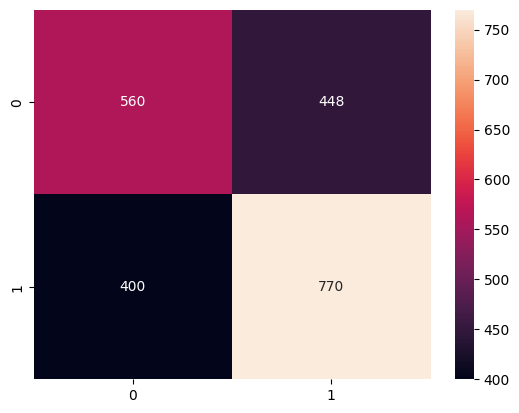

In [63]:
sns.heatmap(cm, annot=True,fmt='d')

In [65]:
print(classification_report(y_test, Y_pred_decoded))

              precision    recall  f1-score   support

           H       0.58      0.56      0.57      1008
          NH       0.63      0.66      0.64      1170

    accuracy                           0.61      2178
   macro avg       0.61      0.61      0.61      2178
weighted avg       0.61      0.61      0.61      2178



**Clearly XGBoost seems like the best model as it has the highest F1 score and accuracy score on the test set.**


# Tuning the parameters of XGBoost.


In [ ]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''

    y_pred = clf.predict(features)
    
    return f1_score(target, y_pred, pos_label=0), sum(target == y_pred) / float(len(y_pred))

# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label=0)  # 0 corresponds to 'H' in encoded labels

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train_encoded)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train_encoded)
print( "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test_encoded)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=40,
              n_jobs=None, num_parallel_tree=None, ...)
F1 score and accuracy score for training set: 0.5932 , 0.6616.
F1 score and accuracy score for test set: 0.5680 , 0.6410.


## **Save the model**


In [71]:
import pickle
import joblib

# Save the best XGBoost model using pickle
with open('Models/best_xgboost_model.pkl', 'wb') as f:
  pickle.dump(clf, f)

# Alternative: Save using joblib (often better for scikit-learn models)
joblib.dump(clf, 'Models/best_xgboost_model.joblib')

# Also save the label encoder for future predictions
joblib.dump(label_encoder, 'Models/label_encoder.joblib')

print("Model and label encoder saved successfully!")

Model and label encoder saved successfully!


## **Import the Models amd Test**


In [72]:
# Importing the saved model and label encoder
# Predicting with the saved model
import joblib

clf = joblib.load('Models/best_xgboost_model.joblib')
label_encoder = joblib.load('Models/label_encoder.joblib')
# Example input data for prediction
example_input = X_test.iloc[0]  # Use the first row of the test set as an example
example_input = example_input.values.reshape(1, -1)  # Reshape to match expected input shape

# Making a prediction
predicted_prob = clf.predict_proba(example_input)
predicted_label = clf.predict(example_input)

# Inverse transform the predicted label
predicted_label = label_encoder.inverse_transform(predicted_label)

print("Predicted probabilities:", predicted_prob)
print("Predicted label:", predicted_label)

Predicted probabilities: [[0.3555162 0.6444838]]
Predicted label: ['NH']


## Model Prediction Interpretation

The model has made a prediction for a specific football match with the following results:

### **Predicted Probabilities:**

- **Home Team Win (H): 35.55%**
- **No Home Team Win (NH): 64.45%**

### **Final Prediction: NH (No Home Team Win)**

This means the model predicts that **the home team will NOT win** this particular match. The "NH" category includes both:

- **Draw (D)**
- **Away Team Win (A)**

### **Confidence Level:**

The model is **64.45% confident** that the home team will not win, while only **35.55% confident** that the home team will win.

### **What This Means in Practice:**

- The model suggests **betting against the home team** would be the safer choice
- There's a **higher probability** of either a draw or away team victory
- The prediction shows **moderate confidence** (not extremely high, but clear preference)

### **Important Notes:**

- This is a **binary classification** model (Home Win vs. No Home Win)
- It doesn't distinguish between draws and away wins - both are classified as "NH"
- The actual match outcome could still be a home win despite the prediction
- Model accuracy is around **60-65%** based on the earlier results, so predictions aren't guaranteed

**In simple terms: The model predicts the home team is more likely to lose or draw than to win this match.**


#### Probably little best!!!!!!!!


Accuracy is not soo good but it can improved.

Actually it only depend upon past year match dataset,we can improve the accuracy by putting twitter data related to match, sentiment analysis, chances of player to play a specific match,player performace in recent series,etc..


I hope you find this kernel useful and enjoyable. If so please upVote

Your comments and feedback are most welcome.


In [77]:
import pandas as pd
import random
from itertools import combinations
from datetime import datetime, timedelta

# Get unique teams from the dataset
teams = ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 
     'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 
     'Liverpool', 'Luton Town', 'Man City', 'Man United', 'Newcastle', 
     'Nottingham Forest', 'Sheffield United', 'Tottenham', 'West Ham', 'Wolves']

# Create fixture list
fixtures = []
fixture_id = 1

# Generate round-robin fixtures (each team plays each other twice - home and away)
for round_num in range(2):  # Two rounds for home and away
  team_pairs = list(combinations(teams, 2))
  random.shuffle(team_pairs)  # Randomize fixture order
  
  for home_team, away_team in team_pairs:
    if round_num == 1:  # Second round - swap home and away
      home_team, away_team = away_team, home_team
    
    fixtures.append({
      'FixtureID': fixture_id,
      'HomeTeam': home_team,
      'AwayTeam': away_team,
      'Round': round_num + 1
    })
    fixture_id += 1

# Create a DataFrame and distribute fixtures across 38 matchweeks
fixtures_df = pd.DataFrame(fixtures)

# Distribute fixtures across 38 matchweeks (10 matches per week for 20 teams)
matchweeks = []
matches_per_week = 10
current_week = 1
start_date = datetime(2025, 5, 25)  # Premier League season start

for i in range(0, len(fixtures_df), matches_per_week):
  week_fixtures = fixtures_df.iloc[i:i+matches_per_week].copy()
  
  # Assign matchweek and dates
  for j, (idx, fixture) in enumerate(week_fixtures.iterrows()):
    match_date = start_date + timedelta(weeks=current_week-1, days=random.randint(0, 6))
    
    fixture_data = {
      'Matchweek': current_week,
      'Date': match_date.strftime('%d/%m/%Y'),
      'Time': f"{random.choice(['12:30', '15:00', '17:30', '20:00'])}",
      'HomeTeam': fixture['HomeTeam'],
      'AwayTeam': fixture['AwayTeam'],
      'Venue': f"{fixture['HomeTeam']} Stadium",
      'Status': 'Scheduled'
    }
    matchweeks.append(fixture_data)
  
  current_week += 1

# Create final fixtures DataFrame
fixture_schedule = pd.DataFrame(matchweeks)

# Save to CSV
fixture_schedule.to_csv('Dummy_Datasets/WebScrapping_Matches/premier_league_fixtures_2024-25.csv', index=False)

print(f"Generated {len(fixture_schedule)} fixtures across {fixture_schedule['Matchweek'].max()} matchweeks")
print("\nSample fixtures:")
print(fixture_schedule.head(10))

# Verify each team plays 38 matches
team_match_counts = {}
for _, row in fixture_schedule.iterrows():
  home_team = row['HomeTeam']
  away_team = row['AwayTeam']
  
  team_match_counts[home_team] = team_match_counts.get(home_team, 0) + 1
  team_match_counts[away_team] = team_match_counts.get(away_team, 0) + 1

print(f"\nMatch count verification:")
for team, count in sorted(team_match_counts.items()):
  print(f"{team}: {count} matches")

Generated 380 fixtures across 38 matchweeks

Sample fixtures:
   Matchweek        Date   Time     HomeTeam           AwayTeam  \
0          1  29/05/2025  17:30     Man City          Tottenham   
1          1  26/05/2025  20:00    Brentford           Brighton   
2          1  31/05/2025  12:30      Arsenal          Tottenham   
3          1  25/05/2025  12:30    Liverpool             Wolves   
4          1  26/05/2025  12:30      Burnley  Nottingham Forest   
5          1  26/05/2025  12:30      Everton             Wolves   
6          1  31/05/2025  20:00   Luton Town           Man City   
7          1  25/05/2025  17:30     Brighton         Man United   
8          1  29/05/2025  17:30  Aston Villa          Brentford   
9          1  31/05/2025  17:30      Chelsea          Liverpool   

                 Venue     Status  
0     Man City Stadium  Scheduled  
1    Brentford Stadium  Scheduled  
2      Arsenal Stadium  Scheduled  
3    Liverpool Stadium  Scheduled  
4      Burnley Stadi